**GET DATA**

Summary of this notebook: ...

Definition of Done: ...

In [ ]:
# Import google drive and select a root directory
from google.colab import drive
drive.mount("/content/gdrive")

!ls -lht /content/gdrive

ROOT_DIR = "/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/"
# !ls -lht $ROOT_DIR

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 8.0K
drwx------ 12 root root 4.0K Jun 30 17:38 'My Drive'
drwx------  3 root root 4.0K Jun 30 17:38 'Shared drives'


In [ ]:
import os
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# Get the filenames, feature list (embeddings), and classification for the feature extraction done in part 2
# Class_ids are binary. Cloud street or not. 
# filenames = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/filenames-nasa-impact-cloudstreet-smaller.pickle', 'rb'))
feature_list = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/features-nasa-impact-cloudstreet-smaller-resnet.pickle', 'rb'))
class_ids = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/class_ids-nasa-impact-cloudstreet-smaller.pickle', 'rb'))

In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.tif']
 
def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            print("filename:", filename)
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

filenames = sorted(get_file_list(ROOT_DIR))

filename: class_ids-nasa-impact-cloudstreet-smaller.pickle
filename: filenames-nasa-impact-cloudstreet-smaller.pickle
filename: features-nasa-impact-cloudstreet-smaller-resnet.pickle
filename: model-finetuned.h5
filename: features-nasa-impact-cloudstreet-smaller-resnet-finetuned.pickle
filename: cloud_streets_australia_Aqua_2015114.jpg
filename: cloud_streets_australia_Aqua_2015095.jpg
filename: cloud_streets_australia_Aqua_2015119.jpg
filename: cloud_streets_australia_Aqua_2015152.jpg
filename: cloud_streets_australia_Aqua_2015174.jpg
filename: cloud_streets_australia_Aqua_2015170.jpg
filename: cloud_streets_australia_Aqua_2015124.jpg
filename: cloud_streets_australia_Aqua_2015133.jpg
filename: cloud_streets_australia_Aqua_2015195.jpg
filename: cloud_streets_australia_Aqua_2015193.jpg
filename: cloud_streets_australia_Aqua_2015182.jpg
filename: cloud_streets_australia_Aqua_2015188.jpg
filename: cloud_streets_australia_Aqua_2015197.jpg
filename: cloud_streets_australia_Aqua_2015206.jpg

In [ ]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  2001
Number of features per image =  2048


In [ ]:
# feature_list.shape
# print(len(feature_list))

print(len(feature_list[0]))

2048


In [ ]:
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


def calculate_accuracy(feature_list, num_nearest_neighbors):
    correct_predictions = 0
    incorrect_predictions = 0
    neighbors = NearestNeighbors(n_neighbors=num_nearest_neighbors,
                                 algorithm='brute',
                                 metric='euclidean').fit(feature_list)
    for i in tqdm_notebook(range(len(feature_list))):
        distances, indices = neighbors.kneighbors([feature_list[i]])
        for j in range(1, num_nearest_neighbors):
            if (classname(filenames[i]) == classname(
                    filenames[indices[0][j]])):
                correct_predictions += 1
            else:
                incorrect_predictions += 1
        
    # Note, this is actually precision @k
    print(
        "Accuracy is ",
        round(
            100.0 * correct_predictions /
            (1.0 * correct_predictions + incorrect_predictions), 2))

    
    return round(
            100.0 * correct_predictions /
            (1.0 * correct_predictions + incorrect_predictions), 2)

In [ ]:
# Select the number of neighbors to check for accuracy measurement
num_neighbor_check = [2,3,4,5,10,20,30,40,50]
# num_neighbor_check = [2]

presion_k = []
for num_neighbor in num_neighbor_check:
    print(num_neighbor)
    presion_k.append(calculate_accuracy(feature_list, num_neighbor))


2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  77.56
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  77.24
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  77.19
5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  77.07
10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  76.08
20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  74.89
30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  74.45
40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  74.02
50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()



Accuracy is  73.58


Text(0.5, 1.0, 'Precision at K')

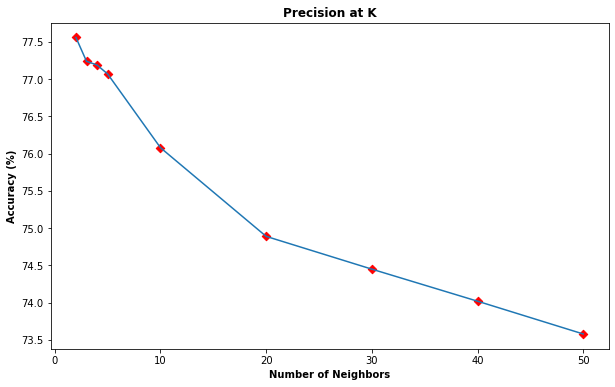

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(num_neighbor_check, presion_k, c='r', marker='D')
plt.plot(num_neighbor_check, presion_k)
plt.xlabel('Number of Neighbors', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Precision at K', fontweight='bold')